In [1]:
from src.model.pl_modules import RacingF1Detector
from src.data.datasets import RacingF1Dataset
from src.data.pl_data_modules import RacingF1DataModule
from pytorch_lightning import Trainer
from src.utils import draw_bounding_box, tensor_to_image
from torch.utils.data import DataLoader
from torchvision import transforms

import torch

In [2]:
augmentation = torch.nn.Sequential(
	transforms.Resize((150, 150))
)

dataset = RacingF1Dataset(['dataset/racing-1'], transforms=augmentation)

trainset, testset, valset = dataset.random_split(0.6, 0.25, 0.15, torch.Generator().manual_seed(42))

In [3]:
batch_size = 32

train_data_loader = DataLoader(trainset, batch_size=batch_size)
test_data_loader = DataLoader(testset, batch_size=batch_size)
val_data_loader = DataLoader(valset, batch_size=batch_size)

In [4]:
sample = trainset[432]
image = tensor_to_image(sample['img'])
image_with_bounding_box = draw_bounding_box(image, sample['bounding_box'])

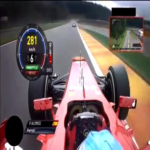

In [5]:
image

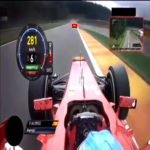

In [6]:
image_with_bounding_box

In [ ]:
hparams = { "kernel_size": 3 }
detector = RacingF1Detector(hparams)

In [ ]:
trainer = Trainer()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
trainer.fit(detector, train_data_loader)

/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:118: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")

  | Name              | Type       | Params
-------------------------------------------------
0 | loss_function     | MSELoss    | 0     
1 | conv_layers       | Sequential | 370 K 
2 | regression_layers | Sequential | 471 M 
-------------------------------------------------
472 M     Trainable params
0         Non-trainable params
472 M     Total params
1,888.962 Total estimated model params size (MB)
/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argum

Epoch 0:   0%|          | 0/31 [00:00<?, ?it/s] 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x369664 and 3686400x128)